In [200]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random 

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.manifold import TSNE

In [2]:
# load dataset 
df = pd.read_csv("product_images.csv")

In [3]:
# visualise first 5 rows of dataset 
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# visualise first 5 rows of dataset 
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,14.363500,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,37.911701,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,250.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [59]:
# info of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 59.8 MB


In [4]:
# get the shape of the dataframe 
df.shape

(10000, 784)

In [576]:
# image visualisation 
# plot 4 images 

def display_image(index):
    
    plt.imshow(df.loc[index].values.reshape(28,28),cmap = 'Greys')

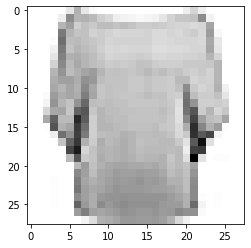

In [577]:
# image of row 5
display_image(5) 

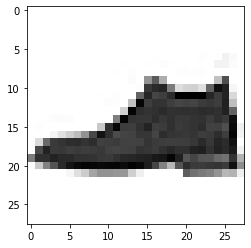

In [8]:
# image of row 230
display_image(230) 

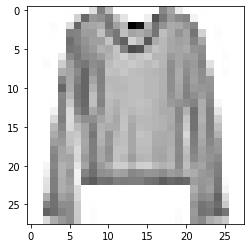

In [9]:
# image of row 40
display_image(40) 

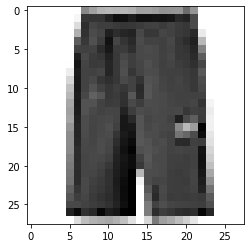

In [25]:
# image of row 9999
display_image(9999) 

### The Next Steps 
1. Contruct the model 
2. Perform feature extraction 
3. Determine the optimal number of clusters
4. Rerun the model to see the improvement and the optimised kmeans model 

In [641]:
# fit a kmeans model to the dataframe
kmeans_model = KMeans(n_clusters=20, max_iter=1000).fit(df)

In [642]:
# create the centroids for the model 
kmeans_centroids = kmeans_model.cluster_centers_
kmeans_centroids

array([[-2.71050543e-19,  1.21430643e-17,  6.93889390e-17, ...,
         2.66187050e-01, -2.22044605e-16,  2.77555756e-17],
       [-1.62630326e-19,  1.21430643e-17,  6.24500451e-17, ...,
         1.33226763e-15, -1.11022302e-16,  4.16333634e-17],
       [-2.16840434e-19,  1.38777878e-17,  6.93889390e-17, ...,
         1.77635684e-15, -2.22044605e-16,  4.16333634e-17],
       ...,
       [-1.08420217e-19,  1.21430643e-17,  6.24500451e-17, ...,
         7.18562874e-02,  0.00000000e+00,  5.55111512e-17],
       [ 5.42101086e-20,  8.67361738e-18,  2.77555756e-17, ...,
        -1.77635684e-15, -1.11022302e-16,  2.77555756e-17],
       [ 1.08420217e-19,  3.46944695e-18, -1.38777878e-17, ...,
         5.67741935e+00,  8.95161290e-01, -2.77555756e-17]])

In [15]:
# visulaise the shape of the centroids 
kmeans_centroids.shape

(20, 784)

In [336]:
# Changed image_df dataframe into a 2-D NumPy array 
# This removes unnecessary information (row indices or column names)
data = df.values
data_indices = np.array(df.index)

In [17]:
# use the kmeans model to predict the clusters 
pred_clusters = kmeans_model.predict(data)

In [18]:
# determine what images went into which cluster 
# create a pandas dataframe of the image row indice and predicted cluster 
# visualise the first 20 rows 
pred_results = pd.DataFrame({'actual_digit': data_indices,'pred_cluster': pred_clusters})
pred_results.head(20)

,actual_digit,pred_cluster
0,0,7
1,1,10
2,2,8
3,3,4
4,4,5
5,5,4
6,6,13
7,7,4
8,8,1
9,9,19


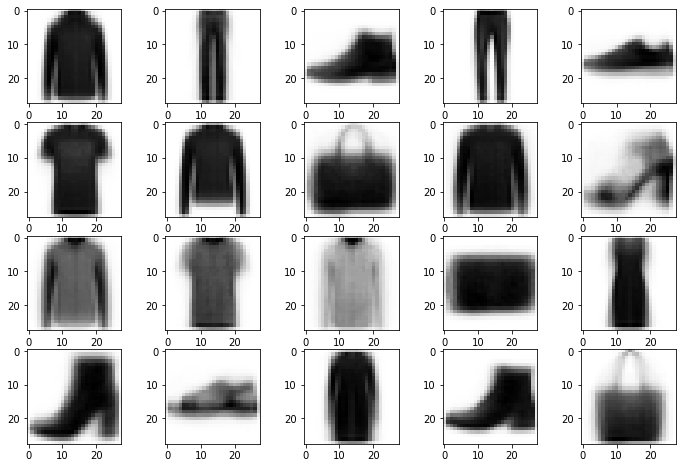

In [643]:
# create plots to show what each cluster's image looks like 
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(4,5, centroid + 1)
    plt.imshow(kmeans_centroids[centroid].reshape(28,28), cmap='Greys')

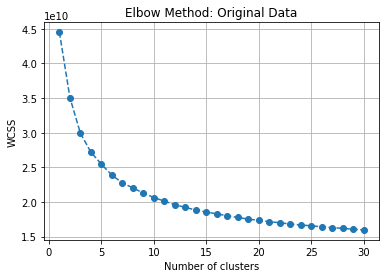

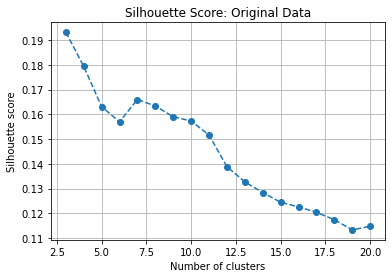

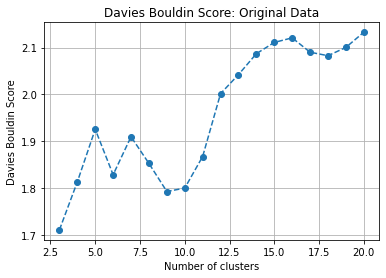

In [347]:
# Evaluating the quality of the clusters using no feature extraction methods 
# Printing the graphs to find a sensible optimal number of clusters 
# Finding the scores when k = optimal number of clusters 

wcss = []
for k in range(1, 31): 
    kmeans_data = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_data.fit(data) 
    wcss.append(kmeans_data.inertia_)

plt.plot(range(1, 31), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method: Original Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

# Creating lists for silhouette score and davies bouldin score 
silhouette_score_o = []
db_score_o = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(data)
    pred_clusters = kmeans_model.predict(data)
    
    db_o = davies_bouldin_score(data, pred_clusters)
    db_score_o.append(db_o)
    
    silhouette_avg_o = silhouette_score(data, pred_clusters)
    silhouette_score_o.append(silhouette_avg_o)

plt.plot(range(3, 21), silhouette_score_o, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: Original Data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()
    
plt.plot(range(3, 21), db_score_o, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: Original Data')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

In [351]:
# Finding the scores when k = 9 
kmeans_model = KMeans(n_clusters=9, init = 'k-means++', max_iter=1000, random_state = 42).fit(data)
pred_clusters = kmeans_model.predict(data)
    
wcss = kmeans_model.inertia_
silhouette_avg_o = silhouette_score(data, pred_clusters)
db_o = davies_bouldin_score(data, pred_clusters)
 
print("For k_clusters = 9 The WCSS score is :", wcss/10**7)
print("For k_clusters = 9 The Silhouette score is :", silhouette_avg_o)
print("For k_clusters = 9 The Davies Bouldin score is :", db_o)

For k_clusters = 9 The WCSS score is : 2127.4866739641475
For k_clusters = 9 The Silhouette score is : 0.15902668762079375
For k_clusters = 9 The Davies Bouldin score is : 1.7923718035911769


### To improve the performance of the kmeans model the dataset undergoes feature extraction 
1. PCA
2. t-SNSE


### For every feature extraction dataset: 
Methods:
1. Elbow method 
2. Average Silhouette score 
3. Davies-Bouldin index

Use these measure to determine which feature extraction dataset is best to use on the kmeans model and determine the optimal number of clusters 

#### PCA feature extraction 

In [20]:
# feature extraction: PCA on the entire dataset 
# Scale the data 
scale = StandardScaler() 
scaled = scale.fit_transform(df)

# Normalizing the scaled data
normalized = normalize(scaled) 
  
# Converting the normalised numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized, columns = df.columns)
normalized_df.head(10)

# Principle component analysis 
pca = PCA(n_components = 784)
pca_df = pca.fit_transform(normalized_df) 
pca_df = pd.DataFrame(pca_df) 

# Transforming it to pandas data frame data type
pca_df.columns = [pca_df.add_prefix('PC_')]
pca_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_774,PC_775,PC_776,PC_777,PC_778,PC_779,PC_780,PC_781,PC_782,PC_783
0,-0.625155,0.071012,-0.008691,0.292689,0.366715,-0.067596,-0.099609,0.103564,-0.165255,-0.058839,...,0.011457,0.001698,0.001495,-0.000475,-0.001223,0.006968,0.008066,0.011382,-0.000509,0.000569
1,-0.030165,0.703675,-0.187510,-0.099676,-0.296489,-0.136035,0.135807,0.100703,0.194786,-0.082721,...,-0.000096,0.000167,-0.000349,0.001175,0.001063,0.000152,0.000503,-0.000608,-0.000100,-0.000583
2,0.445530,0.086999,0.558507,0.024487,-0.076112,-0.238141,-0.091842,-0.081268,0.022162,-0.041268,...,0.000764,0.001049,0.002189,-0.000885,0.001675,-0.001181,-0.000774,-0.000960,0.000148,0.000598
3,-0.250091,-0.137584,0.367069,0.297996,0.170703,-0.263320,0.169950,-0.079935,0.155377,-0.118334,...,-0.000184,0.002323,0.003386,-0.000068,-0.007862,-0.001092,-0.007197,0.006966,-0.003074,0.005922
4,-0.171565,0.355091,-0.228461,-0.303977,-0.001718,-0.207674,-0.187051,-0.016524,-0.168511,0.170582,...,-0.000415,0.000651,-0.000239,0.000119,-0.000128,-0.000393,-0.000156,0.000835,-0.001235,-0.000736


In [21]:
# Determine the explained variance 
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.38679645e-01 1.56448294e-01 7.27890247e-02 4.48759572e-02
 3.62860055e-02 3.39105928e-02 2.39381917e-02 1.70727998e-02
 1.51855845e-02 1.42536931e-02 1.15895013e-02 9.80320885e-03
 8.67191987e-03 7.30996614e-03 6.97483963e-03 6.50240540e-03
 6.14910313e-03 5.63488222e-03 5.44477821e-03 5.14090795e-03
 4.97339733e-03 4.65240685e-03 4.41245171e-03 4.30115815e-03
 4.11683568e-03 4.07438881e-03 3.96187067e-03 3.78766473e-03
 3.56741113e-03 3.44954889e-03 3.35544625e-03 3.16499872e-03
 3.09587489e-03 3.00021939e-03 2.93168470e-03 2.76364581e-03
 2.71744651e-03 2.68662257e-03 2.54918931e-03 2.41352231e-03
 2.34899192e-03 2.33671242e-03 2.30623309e-03 2.27881729e-03
 2.21078490e-03 2.15698446e-03 2.10286063e-03 2.05858672e-03
 2.01751241e-03 1.96466617e-03 1.89877745e-03 1.83559171e-03
 1.83360211e-03 1.79166205e-03 1.70958496e-03 1.68458416e-03
 1.62038285e-03 1.61058496e-03 1.58277488e-03 1.55420167e-03
 1.52133283e-03 1.48082825e-03 1.46478041e-03 1.44298305e-03
 1.40478037e-03 1.385896

In [44]:
# Visualise the shape of the explained variance arrary
explained_variance.shape

(784,)

Text(0, 0.5, 'Number of Explained Variance')

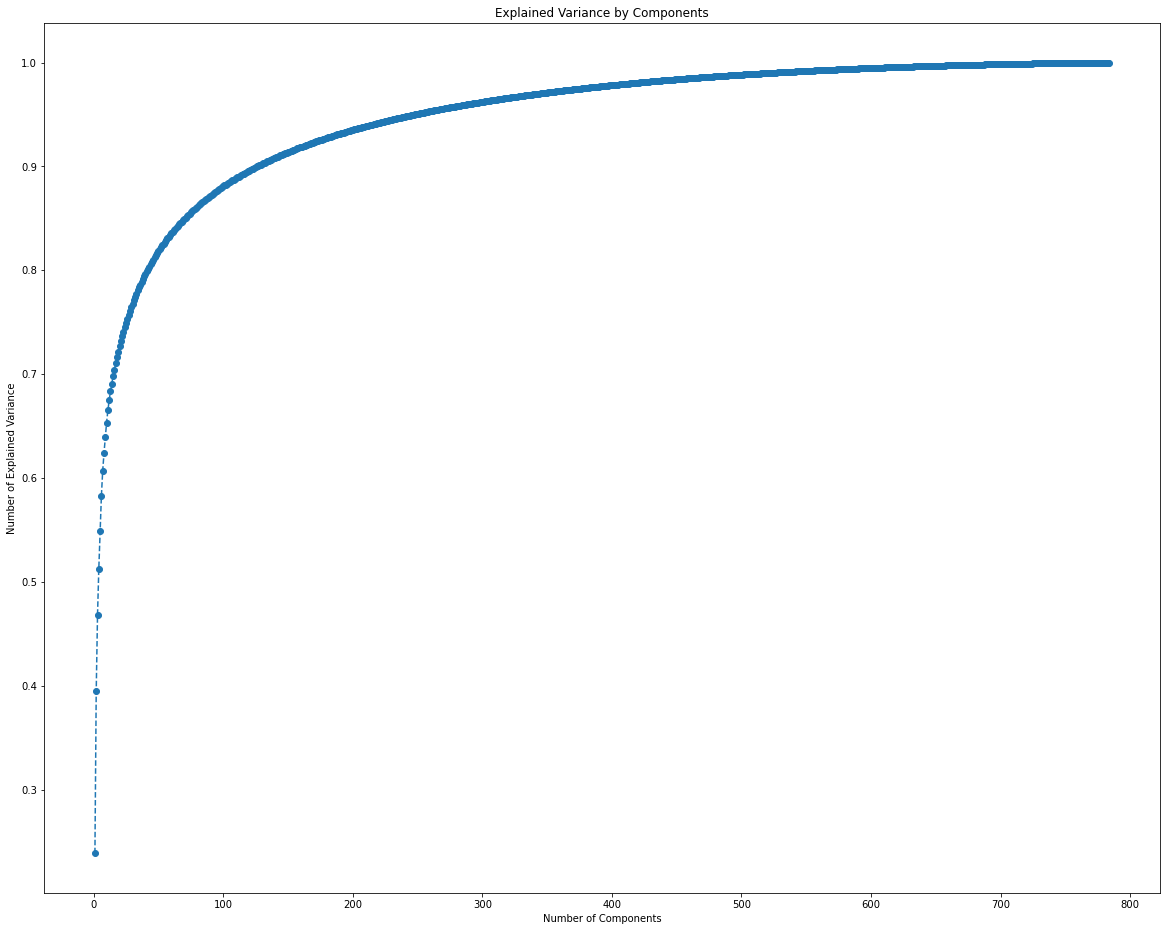

In [22]:
# Plot the explained variances on a plot 
plt.figure(figsize = (20,16))
plt.plot(range(1,785), explained_variance.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Number of Explained Variance')

In [30]:
# Determine the number of components for preserving different ratios 
print(np.interp(0.8, explained_variance.cumsum(), range(1,785)))
print(np.interp(0.75, explained_variance.cumsum(), range(1,785)))
print(np.interp(0.7, explained_variance.cumsum(), range(1,785)))

# Determine the variance preserved when using 2 components 
print(np.interp(2, range(1,785), explained_variance.cumsum()))

41.43390986522974
25.216584432298326
15.33999353788193
0.39512793899474985


In [31]:
# Converting the number of chosen components into dataframes 
# 1. 40 components 

# Principle component analysis 
pca1 = PCA(n_components = 40)
pca1_df = pca1.fit_transform(normalized_df)  

# Transforming it to pandas data frame data type
pca1_df = pd.DataFrame(pca1_df)
pca1_df.columns = [pca1_df.add_prefix('PC_')]
pca1_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39
0,-0.625155,0.071012,-0.008691,0.292689,0.366715,-0.067596,-0.099609,0.103564,-0.165255,-0.058839,...,-0.025345,0.102799,-0.039317,-0.006801,0.027520,0.011946,0.003539,-0.037360,0.010064,-0.019845
1,-0.030165,0.703675,-0.187510,-0.099676,-0.296489,-0.136035,0.135807,0.100703,0.194786,-0.082721,...,0.033492,0.028976,-0.018430,-0.043337,0.048739,0.014871,0.024770,0.033086,-0.023585,0.017073
2,0.445530,0.086999,0.558507,0.024487,-0.076112,-0.238141,-0.091842,-0.081268,0.022162,-0.041268,...,0.032006,-0.033686,-0.003049,-0.025504,-0.043461,-0.071512,-0.049336,0.086975,-0.011335,0.105045
3,-0.250091,-0.137584,0.367069,0.297996,0.170703,-0.263320,0.169950,-0.079935,0.155377,-0.118334,...,-0.030198,-0.111619,-0.033531,-0.019331,-0.105518,-0.046664,0.038336,-0.047736,-0.042406,0.068076
4,-0.171565,0.355091,-0.228461,-0.303977,-0.001718,-0.207674,-0.187051,-0.016524,-0.168511,0.170582,...,-0.020495,0.128934,0.136114,0.014763,-0.045163,-0.073699,-0.008591,0.098426,0.113136,-0.089310


In [32]:
# Save it as an array for use in kmeans model 
pca1_data = pca1.fit_transform(normalized_df) 

In [33]:
# Converting the number of chosen components into dataframes 
# 2. 25 components 

# Principle component analysis 
pca2 = PCA(n_components = 25)
pca2_df = pca2.fit_transform(normalized_df) 

# Transforming it to pandas data frame data type
pca2_df = pd.DataFrame(pca2_df) 
pca2_df.columns = [pca2_df.add_prefix('PC_')]
pca2_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24
0,-0.625155,0.071012,-0.008691,0.292689,0.366715,-0.067596,-0.099609,0.103564,-0.165255,-0.058839,...,0.008323,-0.022234,0.121761,-0.064480,0.040129,-0.004504,-0.136324,0.066207,0.032742,0.034888
1,-0.030165,0.703675,-0.187510,-0.099676,-0.296489,-0.136035,0.135807,0.100703,0.194786,-0.082721,...,-0.086902,-0.056860,0.001565,-0.028050,0.008682,-0.024692,0.006948,0.163180,0.012576,0.026349
2,0.445530,0.086999,0.558507,0.024487,-0.076112,-0.238141,-0.091842,-0.081267,0.022162,-0.041267,...,0.148059,-0.066013,-0.025775,-0.136113,0.071752,0.043738,-0.002632,-0.036965,0.009219,0.044903
3,-0.250091,-0.137584,0.367069,0.297996,0.170703,-0.263320,0.169950,-0.079935,0.155377,-0.118334,...,0.179985,-0.002530,-0.095025,0.098187,-0.023180,0.077287,-0.010532,0.000253,-0.081278,0.007029
4,-0.171565,0.355091,-0.228461,-0.303977,-0.001718,-0.207674,-0.187051,-0.016524,-0.168512,0.170583,...,0.073641,0.006855,-0.030879,0.076470,0.065032,-0.023281,-0.081891,0.051761,0.106359,0.021470


In [36]:
# Save it as an array for use in kmeans model 
pca2_data = pca2.fit_transform(normalized_df) 

In [37]:
# Converting the number of chosen components into dataframes 
# 3. 15 components 

# Principle component analysis 
pca3 = PCA(n_components = 15)
pca3_df = pca3.fit_transform(normalized_df) 

# Transforming it to pandas data frame data type
pca3_df = pd.DataFrame(pca3_df) 
pca3_df.columns = [pca3_df.add_prefix('PC_')]
pca3_df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,-0.625155,0.071012,-0.008691,0.292689,0.366715,-0.067596,-0.099609,0.103558,-0.165263,-0.058746,-0.188211,-0.033950,-0.112763,-0.120735,0.079802
1,-0.030165,0.703675,-0.187510,-0.099676,-0.296489,-0.136035,0.135807,0.100704,0.194790,-0.082722,-0.048004,-0.165204,-0.063127,0.017510,0.013461
2,0.445530,0.086999,0.558507,0.024487,-0.076112,-0.238141,-0.091843,-0.081272,0.022155,-0.041223,0.151143,0.079777,0.048071,0.204848,-0.031073
3,-0.250091,-0.137584,0.367069,0.297996,0.170703,-0.263320,0.169950,-0.079930,0.155392,-0.118392,-0.022340,-0.151036,0.173806,-0.046137,-0.050561
4,-0.171565,0.355091,-0.228461,-0.303977,-0.001718,-0.207674,-0.187051,-0.016525,-0.168509,0.170639,0.143352,0.075265,0.255677,-0.190313,0.007540


In [38]:
# Save it as an array for use in kmeans model 
pca3_data = pca3.fit_transform(normalized_df) 

In [39]:
# Consider only the two best explained variances 

# Principle component analysis 
pca4 = PCA(n_components = 2)
pca4_df = pca4.fit_transform(normalized_df)  

# Transforming it to pandas data frame data type
pca4_df = pd.DataFrame(pca4_df)
pca4_df.columns = [pca4_df.add_prefix('PC_')]
pca4_df.head()

,PC_0,PC_1
0,-0.625155,0.071012
1,-0.030165,0.703675
2,0.445530,0.086999
3,-0.250091,-0.137584
4,-0.171565,0.355091


In [40]:
# Save it as an array for use in kmeans model 
pca4_data = pca4.fit_transform(normalized_df) 

### Implement the quality metrics on the PCA feature extraction datasets 

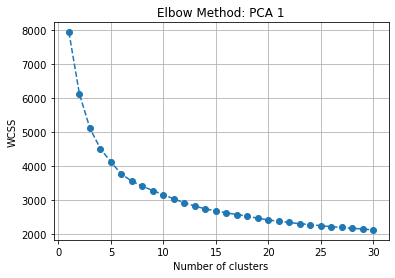

In [374]:
# Elbow method for PCA 1. data array 
wcss1 = []
for k in range(1, 31): 
    kmeans_pca1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_pca1.fit(pca1_data) 
    wcss1.append(kmeans_pca1.inertia_)

plt.plot(range(1, 31), wcss1, marker = 'o', linestyle = '--')
plt.title('Elbow Method: PCA 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

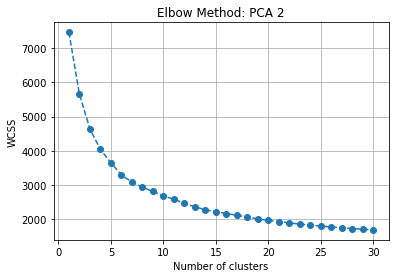

In [375]:
# Elbow method for PCA 2. data array 
wcss2 = []
for k in range(1, 31): 
    kmeans_pca2 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_pca2.fit(pca2_data) 
    wcss2.append(kmeans_pca2.inertia_)

plt.plot(range(1, 31), wcss2, marker = 'o', linestyle = '--')
plt.title('Elbow Method: PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

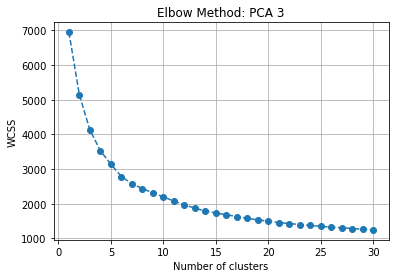

In [376]:
# Elbow method for PCA 3. data array 
wcss3 = []
for k in range(1, 31): 
    kmeans_pca3 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_pca3.fit(pca3_data) 
    wcss3.append(kmeans_pca3.inertia_)

plt.plot(range(1, 31), wcss3, marker = 'o', linestyle = '--')
plt.title('Elbow Method: PCA 3')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

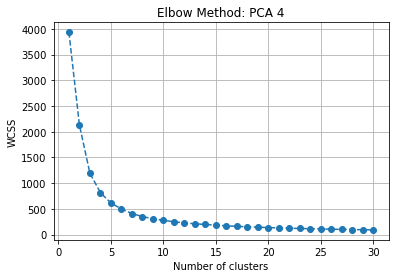

In [377]:
# Elbow method for PCA 4. data array 
wcss4 = []
for k in range(1, 31): 
    kmeans_pca4 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_pca4.fit(pca4_data) 
    wcss4.append(kmeans_pca4.inertia_)

plt.plot(range(1, 31), wcss4, marker = 'o', linestyle = '--')
plt.title('Elbow Method: PCA 4')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

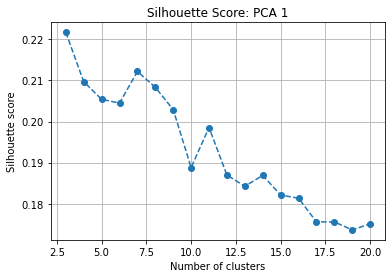

In [378]:
# Silhouette score for PCA 1. data array 
silhouette_score_1 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca1_data)
    pred_clusters = kmeans_model.predict(pca1_data)
    silhouette_avg_1 = silhouette_score(pca1_data, pred_clusters)
    silhouette_score_1.append(silhouette_avg_1)
    
plt.plot(range(3, 21), silhouette_score_1, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: PCA 1')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()

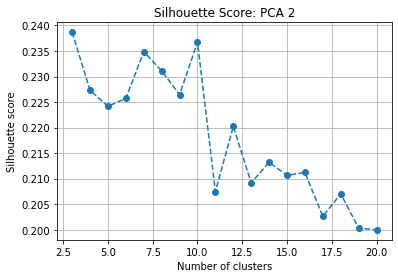

In [379]:
# Silhouette score for PCA 2. data array 
silhouette_score_2 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca2_data)
    pred_clusters = kmeans_model.predict(pca2_data)
    silhouette_avg_2 = silhouette_score(pca2_data, pred_clusters)
    silhouette_score_2.append(silhouette_avg_2)
    
plt.plot(range(3, 21), silhouette_score_2, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()

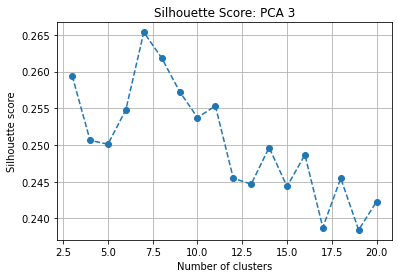

In [380]:
# Silhouette score for PCA 3. data array 
silhouette_score_3 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca3_data)
    pred_clusters = kmeans_model.predict(pca3_data)
    silhouette_avg_3 = silhouette_score(pca3_data, pred_clusters)
    silhouette_score_3.append(silhouette_avg_3)
    
plt.plot(range(3, 21), silhouette_score_3, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: PCA 3')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()

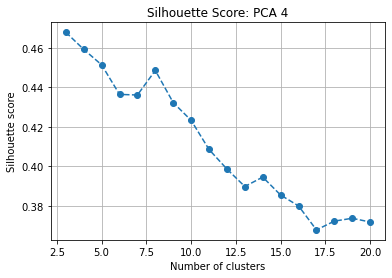

In [381]:
# Silhouette score for PCA 4. data array 
silhouette_score_4 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca4_data)
    pred_clusters = kmeans_model.predict(pca4_data)
    silhouette_avg_4 = silhouette_score(pca4_data, pred_clusters)
    silhouette_score_4.append(silhouette_avg_4)
    
plt.plot(range(3, 21), silhouette_score_4, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: PCA 4')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()

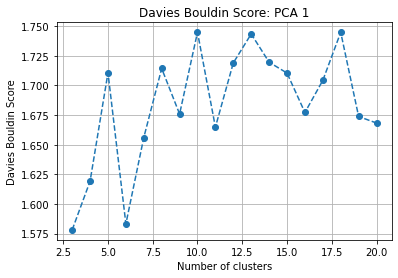

In [382]:
# Compute the davies bouldin score for PCA 1
db_score_1 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca1_data)
    pred_clusters = kmeans_model.predict(pca1_data)
    db_1 = davies_bouldin_score(pca1_data, pred_clusters)
    db_score_1.append(db_1)
    
plt.plot(range(3, 21), db_score_1, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: PCA 1')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

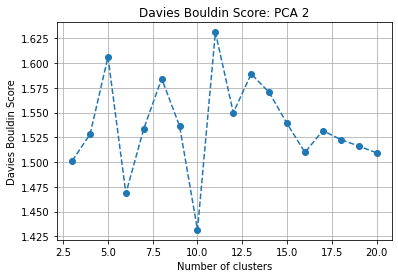

In [383]:
# Compute the davies bouldin score for PCA 2
db_score_2 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca2_data)
    pred_clusters = kmeans_model.predict(pca2_data)
    db_2 = davies_bouldin_score(pca2_data, pred_clusters)
    db_score_2.append(db_2)
    
plt.plot(range(3, 21), db_score_2, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

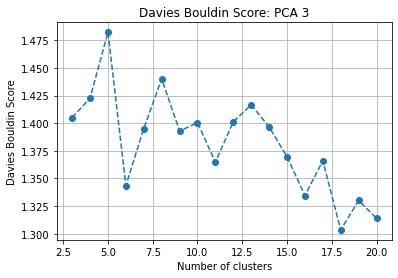

In [384]:
# Compute the davies bouldin score for PCA 3
db_score_3 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca3_data)
    pred_clusters = kmeans_model.predict(pca3_data)
    db_3 = davies_bouldin_score(pca3_data, pred_clusters)
    db_score_3.append(db_3)
    
plt.plot(range(3, 21), db_score_3, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: PCA 3')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

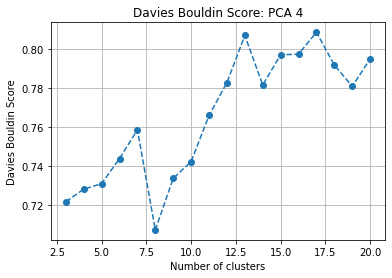

In [385]:
# Compute the davies bouldin score for PCA 4
db_score_4 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(pca4_data)
    pred_clusters = kmeans_model.predict(pca4_data)
    db_4 = davies_bouldin_score(pca4_data, pred_clusters)
    db_score_4.append(db_4)
    
plt.plot(range(3, 21), db_score_4, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: PCA 4')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

#### Use all graphs (quality metrics) to determine a sensible optimal k score for each PCA dataset
#### Find the y-axis (quality metric score) intercept at the point for optimal k

In [387]:
# Determine the scores from the graph at optimal k number 
print('PCA 1 - WCSS score at optimal k number:', np.interp(10, range(1, 31), wcss1))
print('PCA 1 - Silhouette score at optimal k number:', np.interp(10, range(3, 21), silhouette_score_1))
print('PCA 1 - Davies Bouldin score at optimal k number:', np.interp(10, range(3, 21), db_score_1))
print()
print('PCA 2 - WCSS score at optimal k number:', np.interp(10, range(1, 31), wcss2))
print('PCA 2 - Silhouette score at optimal k number:', np.interp(10, range(3, 21), silhouette_score_2))
print('PCA 2 - Davies Bouldin score at optimal k number:', np.interp(10, range(3, 21), db_score_2))
print()
print('PCA 3 - WCSS score at optimal k number:', np.interp(6, range(1, 31), wcss3))
print('PCA 3 - Silhouette score at optimal k number:', np.interp(10, range(3, 21), silhouette_score_3))
print('PCA 3 - Davies Bouldin score at optimal k number:', np.interp(10, range(3, 21), db_score_3))
print()
print('PCA 4 - WCSS score at optimal k number:', np.interp(8, range(1, 31), wcss4))
print('PCA 4 - Silhouette score at optimal k number:', np.interp(10, range(3, 21), silhouette_score_4))
print('PCA 4 - Davies Bouldin score at optimal k number:', np.interp(10, range(3, 21), db_score_4))

PCA 1 - WCSS score at optimal k number: 3164.68294581055
PCA 1 - Silhouette score at optimal k number: 0.1888058029024013
PCA 1 - Davies Bouldin score at optimal k number: 1.744746170887661

PCA 2 - WCSS score at optimal k number: 2686.531504866472
PCA 2 - Silhouette score at optimal k number: 0.23673745910825084
PCA 2 - Davies Bouldin score at optimal k number: 1.4315148778635964

PCA 3 - WCSS score at optimal k number: 2787.412475016704
PCA 3 - Silhouette score at optimal k number: 0.25373689400464283
PCA 3 - Davies Bouldin score at optimal k number: 1.4004353235032592

PCA 4 - WCSS score at optimal k number: 349.3167948479505
PCA 4 - Silhouette score at optimal k number: 0.42327109838855304
PCA 4 - Davies Bouldin score at optimal k number: 0.7423323520381271


#### t-SNE feature extraction 

In [65]:
# Feature extraction using tsne with 2 components
tsne1 = TSNE(n_components=2, perplexity=30, random_state=1).fit_transform(normalized_df)

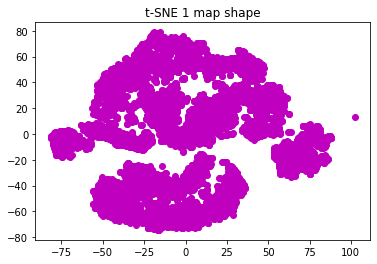

In [73]:
# Map the graph of tsne1 
plt.scatter(tsne1[:,0], tsne1[:,1], c = 'm')
plt.title('t-SNE 1 map shape')
plt.show()

In [71]:
# Feature extraction using tsne with 3 components
tsne2 = TSNE(n_components=3, perplexity=30, random_state=1).fit_transform(normalized_df)

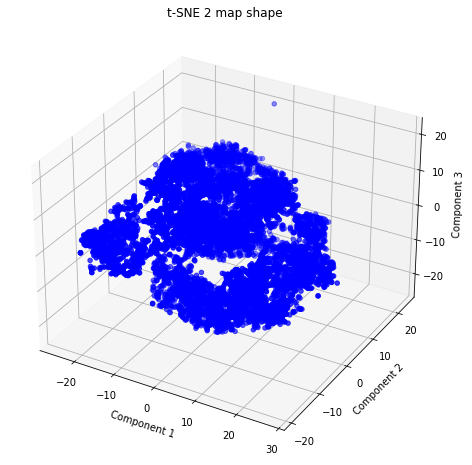

In [83]:
# Map the graph of tsne2
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne2[:,0], tsne2[:,1], tsne2[:,2], c = 'b')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('t-SNE 2 map shape')
plt.show()

In [75]:
# Feature extraction using tsne PCA with 2 components
tsnepca1 = TSNE(n_components=2, perplexity=30, random_state=1).fit_transform(pca_df)

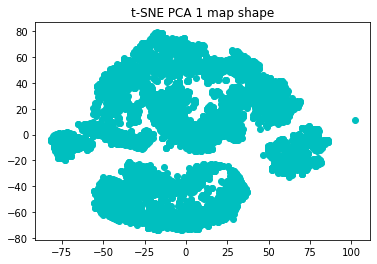

In [77]:
# Map the graph of tsne pca 1 
plt.scatter(tsnepca1[:,0], tsnepca1[:,1], c = 'c')
plt.title('t-SNE PCA 1 map shape')
plt.show()

In [78]:
# Feature extraction using tsne PCA with 3 components
tsnepca2 = TSNE(n_components=3, perplexity=30, random_state=1).fit_transform(pca_df)

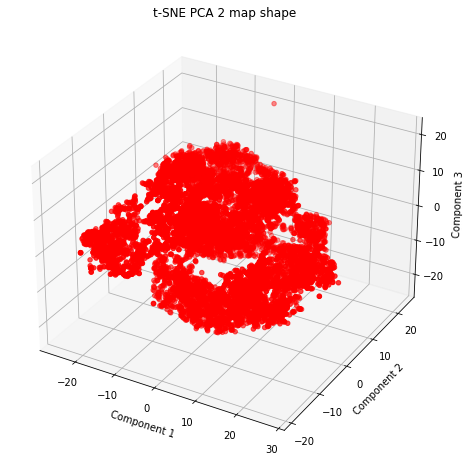

In [84]:
# Map the graph of tsne pca 2 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(tsnepca2[:,0], tsnepca2[:,1], tsnepca2[:,2], c = 'r')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('t-SNE PCA 2 map shape')
plt.show()

### For each t-SNE dataset determine the WCSS, Silhouette and Davies-Bouldin score and plot on a graph

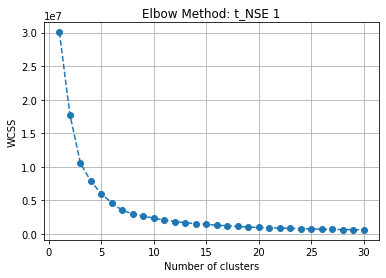

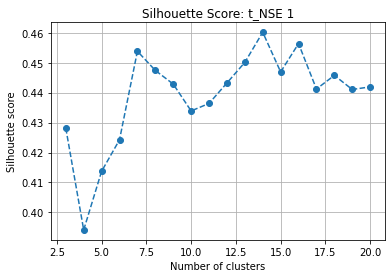

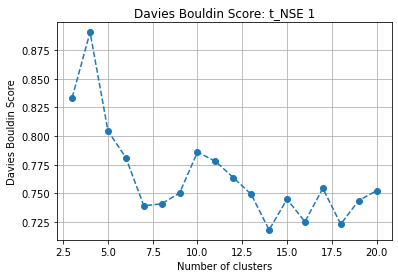

In [388]:
# Scores for t-SNE (standardised data) 1 dataset 

# Creating WCSS scores/ Elbow method 
wcss6 = []
for k in range(1, 31): 
    kmeans_tsne1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_tsne1.fit(tsne1) 
    wcss6.append(kmeans_tsne1.inertia_)

plt.plot(range(1, 31), wcss6, marker = 'o', linestyle = '--')
plt.title('Elbow Method: t_SNE 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

# Creating silhouette score and davies bouldin score 
silhouette_score_6 = []
db_score_6 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(tsne1)
    pred_clusters = kmeans_model.predict(tsne1)
    
    db_6 = davies_bouldin_score(tsne1, pred_clusters)
    db_score_6.append(db_6)
    
    silhouette_avg_6 = silhouette_score(tsne1, pred_clusters)
    silhouette_score_6.append(silhouette_avg_6)

plt.plot(range(3, 21), silhouette_score_6, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: t_SNE 1')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()
    
plt.plot(range(3, 21), db_score_6, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: t_SNE 1')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

In [392]:
# Determine the scores from the graph at optimal k number 
print('t_SNE 1 - WCSS score at optimal k number:', np.interp(14, range(1, 31), wcss6))
print('t_SNE 1 - Silhouette score at optimal k number:', np.interp(14, range(3, 21), silhouette_score_6))
print('t_SNE 1 - Davies Bouldin score at optimal k number:', np.interp(14, range(3, 21), db_score_6))

t_SNE 1 - WCSS score at optimal k number: 1548491.75
t_SNE 1 - Silhouette score at optimal k number: 0.46016865968704224
t_SNE 1 - Davies Bouldin score at optimal k number: 0.7180473696301612


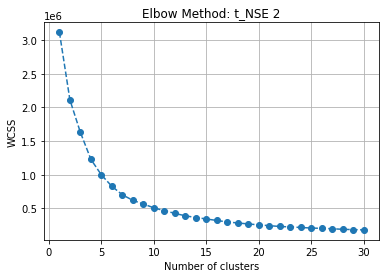

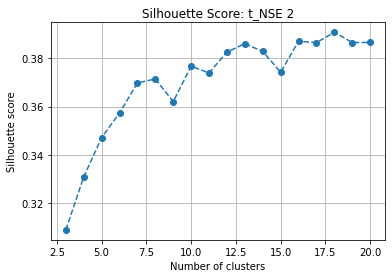

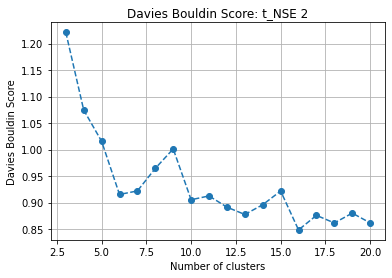

In [389]:
# Scores for t-SNE (standardised data) 2 dataset 

# Creating WCSS scores/ Elbow method 
wcss7 = []
for k in range(1, 31): 
    kmeans_tsne2 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_tsne2.fit(tsne2) 
    wcss7.append(kmeans_tsne2.inertia_)

plt.plot(range(1, 31), wcss7, marker = 'o', linestyle = '--')
plt.title('Elbow Method: t_SNE 2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

# Creating silhouette score and davies bouldin score 
silhouette_score_7 = []
db_score_7 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(tsne2)
    pred_clusters = kmeans_model.predict(tsne2)
    
    db_7 = davies_bouldin_score(tsne2, pred_clusters)
    db_score_7.append(db_7)
    
    silhouette_avg_7 = silhouette_score(tsne2, pred_clusters)
    silhouette_score_7.append(silhouette_avg_7)
    
plt.plot(range(3, 21), silhouette_score_7, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: t_SNE 2')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()
    
plt.plot(range(3, 21), db_score_7, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: t_SNE 2')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

In [393]:
# Determine the scores from the graph at optimal k number 
print('t_SNE 2 - WCSS score at optimal k number:', np.interp(16, range(1, 31), wcss7))
print('t_SNE 2 - Silhouette score at optimal k number:', np.interp(16, range(3, 21), silhouette_score_7))
print('t_SNE 2 - Davies Bouldin score at optimal k number:', np.interp(16, range(3, 21), db_score_7))

t_SNE 2 - WCSS score at optimal k number: 321762.0625
t_SNE 2 - Silhouette score at optimal k number: 0.3870864808559418
t_SNE 2 - Davies Bouldin score at optimal k number: 0.8482434425561222


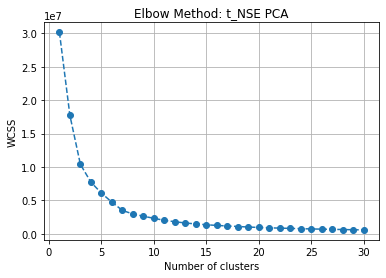

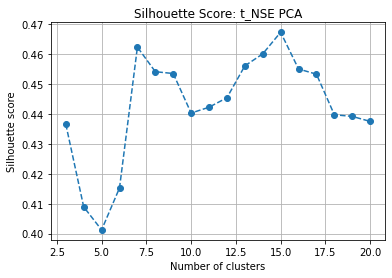

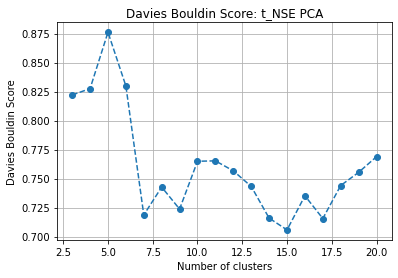

In [390]:
# Scores for t-SNE PCA 1 dataset 

# Creating WCSS scores/ Elbow method 
wcss8 = []
for k in range(1, 31): 
    kmeans_tsnepca1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_tsnepca1.fit(tsnepca1) 
    wcss8.append(kmeans_tsnepca1.inertia_)

plt.plot(range(1, 31), wcss8, marker = 'o', linestyle = '--')
plt.title('Elbow Method: t_NSE PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

# Creating silhouette score and davies bouldin score 
silhouette_score_8 = []
db_score_8 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(tsnepca1)
    pred_clusters = kmeans_model.predict(tsnepca1)
    
    db_8 = davies_bouldin_score(tsnepca1, pred_clusters)
    db_score_8.append(db_8)
    
    silhouette_avg_8 = silhouette_score(tsnepca1, pred_clusters)
    silhouette_score_8.append(silhouette_avg_8)
    
plt.plot(range(3, 21), silhouette_score_8, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: t_NSE PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()
    
plt.plot(range(3, 21), db_score_8, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: t_NSE PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

In [394]:
# Determine the scores from the graph at optimal k number 
print('t_SNE PCA 1 - WCSS score at optimal k number:', np.interp(15, range(1, 31), wcss8))
print('t_SNE PCA 1 - Silhouette score at optimal k number:', np.interp(15, range(3, 21), silhouette_score_8))
print('t_SNE PCA 1 - Davies Bouldin score at optimal k number:', np.interp(15, range(3, 21), db_score_8))

t_SNE PCA 1 - WCSS score at optimal k number: 1370238.875
t_SNE PCA 1 - Silhouette score at optimal k number: 0.46738407015800476
t_SNE PCA 1 - Davies Bouldin score at optimal k number: 0.7056935618715466


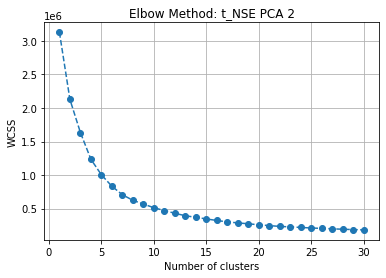

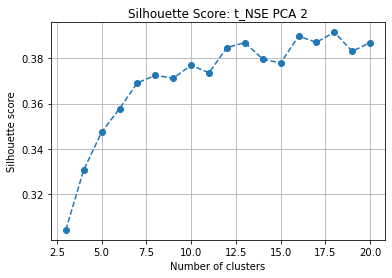

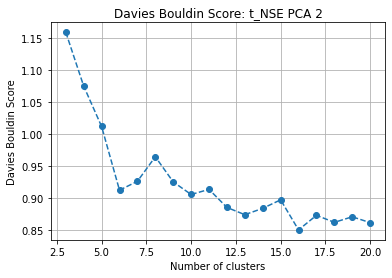

In [391]:
# Scores for t-SNE PCA 2 dataset 

# Creating WCSS scores/ Elbow method 
wcss9 = []
for k in range(1, 31): 
    kmeans_tsnepca2 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_tsnepca2.fit(tsnepca2) 
    wcss9.append(kmeans_tsnepca2.inertia_)

plt.plot(range(1, 31), wcss9, marker = 'o', linestyle = '--')
plt.title('Elbow Method: t_SNE PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.grid()
plt.show()

# Creating silhouette score and davies bouldin score 
silhouette_score_9 = []
db_score_9 = []
for n in range(3,21):
    kmeans_model = KMeans(n_clusters=n, max_iter=1000, random_state = 42).fit(tsnepca2)
    pred_clusters = kmeans_model.predict(tsnepca2)
    
    db_9 = davies_bouldin_score(tsnepca2, pred_clusters)
    db_score_9.append(db_9)
    
    silhouette_avg_9 = silhouette_score(tsnepca2, pred_clusters)
    silhouette_score_9.append(silhouette_avg_9)
    
plt.plot(range(3, 21), silhouette_score_9, marker = 'o', linestyle = '--')
plt.title('Silhouette Score: t_SNE PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.grid()
plt.show()
    
plt.plot(range(3, 21), db_score_9, marker = 'o', linestyle = '--')
plt.title('Davies Bouldin Score: t_SNE PCA 2')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score') 
plt.grid()
plt.show()

In [395]:
# Determine the scores from the graph at optimal k number 
print('t_SNE PCA 2 - WCSS score at optimal k number:', np.interp(16, range(1, 31), wcss9))
print('t_SNE PCA 2 - Silhouette score at optimal k number:', np.interp(16, range(3, 21), silhouette_score_9))
print('t_SNE PCA 2 - Davies Bouldin score at optimal k number:', np.interp(16, range(3, 21), db_score_9))

t_SNE PCA 2 - WCSS score at optimal k number: 322057.15625
t_SNE PCA 2 - Silhouette score at optimal k number: 0.3896690309047699
t_SNE PCA 2 - Davies Bouldin score at optimal k number: 0.84985926036131


####  The feature extraction dataset that performed best was the t-SNE PCA 1 dataset (2 components)

As the task is to create clusters, the t-SNE feature extraction technique with 2 components is the best method to do so. The silhouette and davies-bouldin scores are optimised at 15 clusters (where k = 15).

In [211]:
# Printing the wcss scores for the best feature extraction dataset 
wcss = []
for k in range(2, 21): 
    kmeans_tsnepca1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans_tsnepca1.fit(tsnepca1) 
    wcss.append(kmeans_tsnepca1.inertia_)
    print("For k_clusters =", k, "The WCSS score is :", wcss[-1]/10**7)

For k_clusters = 2 The WCSS score is : 1.7705284
For k_clusters = 3 The WCSS score is : 1.0394755
For k_clusters = 4 The WCSS score is : 0.7739522
For k_clusters = 5 The WCSS score is : 0.61070625
For k_clusters = 6 The WCSS score is : 0.47508455
For k_clusters = 7 The WCSS score is : 0.351915175
For k_clusters = 8 The WCSS score is : 0.29814755
For k_clusters = 9 The WCSS score is : 0.264698225
For k_clusters = 10 The WCSS score is : 0.2338227
For k_clusters = 11 The WCSS score is : 0.2034193625
For k_clusters = 12 The WCSS score is : 0.1828282875
For k_clusters = 13 The WCSS score is : 0.163139625
For k_clusters = 14 The WCSS score is : 0.149962975
For k_clusters = 15 The WCSS score is : 0.137023875
For k_clusters = 16 The WCSS score is : 0.1275497
For k_clusters = 17 The WCSS score is : 0.1189217125
For k_clusters = 18 The WCSS score is : 0.11115925
For k_clusters = 19 The WCSS score is : 0.1035166375
For k_clusters = 20 The WCSS score is : 0.096768125


In [210]:
# Printing the silhouette scores for the best feature extraction dataset 
ss = []
for n in range(2, 21): 
    kmeans_model = KMeans(n_clusters = n, max_iter=1000, random_state = 42).fit(tsnepca1)
    pred_clusters = kmeans_model.predict(tsnepca1)
    silhouette_avg = silhouette_score(tsnepca1, pred_clusters)
    ss.append(silhouette_avg)
    
    print("For k_clusters =", n, "The Silhouette score is :", ss[-1])

For k_clusters = 2 The Silhouette score is : 0.3898341
For k_clusters = 3 The Silhouette score is : 0.43663895
For k_clusters = 4 The Silhouette score is : 0.40895805
For k_clusters = 5 The Silhouette score is : 0.40125206
For k_clusters = 6 The Silhouette score is : 0.41527626
For k_clusters = 7 The Silhouette score is : 0.4624061
For k_clusters = 8 The Silhouette score is : 0.4541877
For k_clusters = 9 The Silhouette score is : 0.45357555
For k_clusters = 10 The Silhouette score is : 0.44034454
For k_clusters = 11 The Silhouette score is : 0.44229874
For k_clusters = 12 The Silhouette score is : 0.44546977
For k_clusters = 13 The Silhouette score is : 0.45613497
For k_clusters = 14 The Silhouette score is : 0.4601461
For k_clusters = 15 The Silhouette score is : 0.46738407
For k_clusters = 16 The Silhouette score is : 0.45509243
For k_clusters = 17 The Silhouette score is : 0.45335498
For k_clusters = 18 The Silhouette score is : 0.43977588
For k_clusters = 19 The Silhouette score is

In [209]:
# Printing the davies bouldin scores for the best feature extraction dataset 
db = []
for k in range(2, 21): 
    kmeans_model = KMeans(n_clusters=k, max_iter=1000, random_state = 42).fit(tsnepca1)
    pred_clusters = kmeans_model.predict(tsnepca1)
    db_x = davies_bouldin_score(tsnepca1, pred_clusters)
    db.append(db_x)
 
    print("For k_clusters =", k, "The Davies Bouldin score is :", db[-1])

For k_clusters = 2 The Davies Bouldin score is : 1.0659659534082015
For k_clusters = 3 The Davies Bouldin score is : 0.8220304308462376
For k_clusters = 4 The Davies Bouldin score is : 0.8275151380399481
For k_clusters = 5 The Davies Bouldin score is : 0.8761088425512782
For k_clusters = 6 The Davies Bouldin score is : 0.8298362751460591
For k_clusters = 7 The Davies Bouldin score is : 0.7185999013946668
For k_clusters = 8 The Davies Bouldin score is : 0.7426290073357154
For k_clusters = 9 The Davies Bouldin score is : 0.7236448235300157
For k_clusters = 10 The Davies Bouldin score is : 0.7648770569870837
For k_clusters = 11 The Davies Bouldin score is : 0.7652391191246971
For k_clusters = 12 The Davies Bouldin score is : 0.7566350483785632
For k_clusters = 13 The Davies Bouldin score is : 0.7432048472222896
For k_clusters = 14 The Davies Bouldin score is : 0.7158742006335214
For k_clusters = 15 The Davies Bouldin score is : 0.7056935618715466
For k_clusters = 16 The Davies Bouldin sco

#### The next step is to create the kmeans model and predict the clusters 

In [409]:
# Create the kmean model 
kmeans_tsnepca1 = KMeans(n_clusters=15, max_iter=1000).fit(tsnepca1)
kmeans_centroids_tsnepca1 = kmeans_tsnepca1.cluster_centers_

# Determine the centroids and convert into a dataframe 
centroids_df = pd.DataFrame(kmeans_centroids_tsnepca1)
centroids_df

,0,1
0,24.696539,-49.348862
1,-39.141560,39.783115
2,50.817570,26.881304
3,-41.980221,-52.483315
4,23.682238,11.249117
5,-10.134974,61.474255
6,66.979767,-13.647514
7,5.382926,-34.190353
8,-69.379478,-5.242585
9,-24.620026,-35.203289


In [86]:
# Predict the clusters from the kmeans model 
# Transform the cluster predictions into a dataframe 
pred_clusters = kmeans_tsnepca1.predict(tsnepca1)
df_pred = pd.DataFrame({'actual_digit': data_indices,'pred_cluster': pred_clusters})
df_pred.head(20)

,actual_digit,pred_cluster
0,0,10
1,1,1
2,2,12
3,3,0
4,4,3
5,5,8
6,6,11
7,7,12
8,8,2
9,9,5


In [88]:
# Transforming t-SNE PCA 1 into a pandas dataframe 
tsnepca1_df = pd.DataFrame(tsnepca1) 
tsnepca1_df.head()

,0,1
0,27.013296,3.660639
1,77.763222,-21.394968
2,-17.517698,19.243696
3,-47.598537,37.871689
4,39.927830,54.269192


In [89]:
# Combine the tsnepca1_df dataframe with the df_pred dataframe 
df_cluster_component = pd.concat([df_pred, tsnepca1_df], axis=1)
df_cluster_component.columns.values[-2: ] = ['Component 1', 'Component 2']
df_cluster_component.head()

,actual_digit,pred_cluster,Component 1,Component 2
0,0,10,27.013296,3.660639
1,1,1,77.763222,-21.394968
2,2,12,-17.517698,19.243696
3,3,0,-47.598537,37.871689
4,4,3,39.927830,54.269192


In [406]:
# Map the clusters and add the column 'Segment'
df_cluster_component['Segment'] = df_cluster_component['pred_cluster'].map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14' })
df_cluster_component.head()

,actual_digit,pred_cluster,Component 1,Component 2,Segment
0,0,10,27.013296,3.660639,10
1,1,1,77.763222,-21.394968,1
2,2,12,-17.517698,19.243696,12
3,3,0,-47.598537,37.871689,0
4,4,3,39.927830,54.269192,3


/Users/kayleedekker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

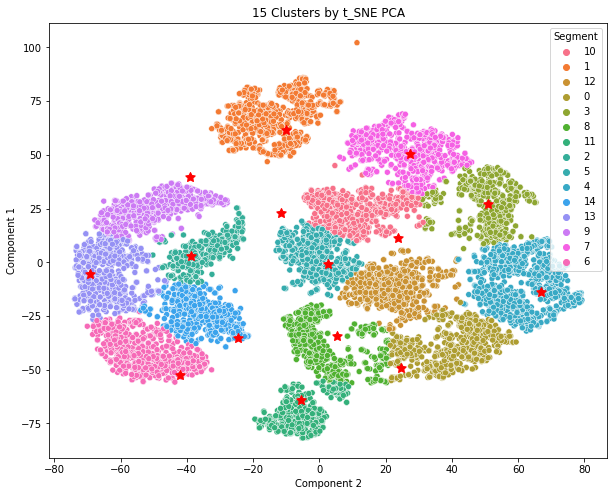

In [634]:
# Plot the components on a scatter graph and group by segments 
x_axis = df_cluster_component['Component 2']
y_axis = df_cluster_component['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_cluster_component['Segment'])
plt.scatter(kmeans_centroids_tsnepca1[:, 0], kmeans_centroids_tsnepca1[:, 1], s=100, c='r', marker=(5, 1))
plt.title('15 Clusters by t_SNE PCA')
plt.show

#### Given the true labels we can evaluate our kmeans algorithm

In [636]:
# Load the true label dataframe 
df_True_label = pd.read_csv("true_label.csv")
df_True_label_1d = df_True_label.values.flatten()

# Compute the rand score 
from sklearn.metrics.cluster import rand_score

rand_score(df_True_label_1d, pred_clusters)

0.9147180718071807

## Recommendation algorithm 

Enter a product number from 0 to 14:8
Recommended products:


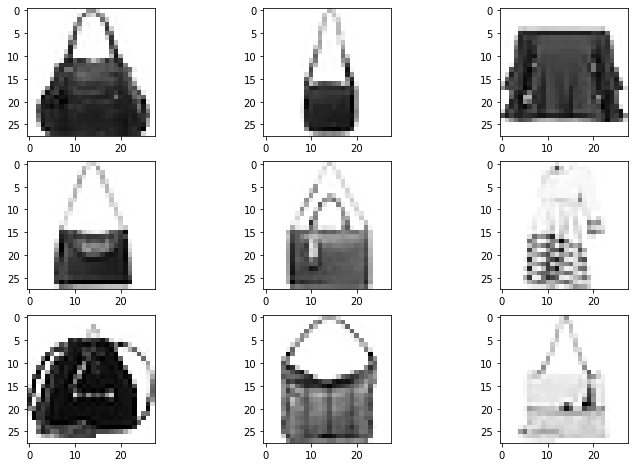

In [639]:
# A customer selects a product number/ category - AKA the product they're browsing on 
# Randomly generate row indices from the original dataframe for the selected product number 

product_number = int(input("Enter a product number from 0 to 14:"))

segmentx_df = df_cluster_component.loc[df_cluster_component['pred_cluster'] == product_number]
segment_x_df = segmentx_df.sample(n=10)
recommended_products_index = np.array(segment_x_df.index)


# Display recommended products similar to the one the customer selected 

fig, ax = plt.subplots(figsize=(12,8))

print('Recommended products:')
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(df.loc[recommended_products_index[i-1]].values.reshape(28,28), cmap = 'Greys') 